Evaluación de la matriz de confusión para todo el conjunto de datos original (sin aumento de la data)
==

Se cargan todos los archivos de la base de datos y se evaluan en el modelo de clasificación.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import confusion_matrix
import warnings
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

In [12]:
model = tf.keras.models.load_model('models/modelo_04_100_epochs_vgg16_modificado_2_sin_transfer_data_ampl.h5') #se carga el modelo y sus pesos

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       295168

In [7]:
CATEGORIES = os.listdir("Input")
CATEGORIES

['MUJER-SHORT',
 'MUJER-CAMISA',
 'MUJER-JOGGER',
 'HOMBRE-PANTALON',
 'HOMBRE-BUSO',
 'MUJER-BUSO',
 'HOMBRE-POLO',
 'MUJER-TOP',
 'HOMBRE-SHORT',
 'MUJER-VESTIDO',
 'HOMBRE-CAMISA',
 'MUJER-PANTALON',
 'HOMBRE-CHAQUETA',
 'HOMBRE-CAMISETA',
 'MUJER-CHAQUETA',
 'HOMBRE-JOGGER',
 'MUJER-TOP_ML',
 'HOMBRE-TANK',
 'MUJER-FALDA']

In [3]:
def cat_text2number(texto):
    dict_cat ={'MUJER-SHORT': [0],
           'MUJER-CAMISA': [1],
           'MUJER-JOGGER': [2],
           'HOMBRE-PANTALON': [3],
           'MUJER-TOP_ML': [4],
           'HOMBRE-BUSO': [5],
           'MUJER-BUSO': [6],
           'HOMBRE-POLO': [7],
           'MUJER-TOP': [8],
           'HOMBRE-SHORT': [9],
           'MUJER-PANTALON': [10],
           'MUJER-VESTIDO': [11],
           'HOMBRE-CAMISA': [12],
           'HOMBRE-CHAQUETA': [13],
           'HOMBRE-CAMISETA': [14],
           'MUJER-CHAQUETA': [15],
           'HOMBRE-JOGGER': [16],
           'HOMBRE-TANK': [17],
           'MUJER-FALDA': [18]}
    val = dict_cat[texto][0]
    return val

In [4]:
def loadTrainingData(rootDir, IMG_S):
    count_1=0
    count_2=0
    count_3=0
    path_t = rootDir
    for categorie in CATEGORIES:
        PATH = os.path.join(path_t,categorie)
        class_num = cat_text2number(categorie)
        for img in os.listdir(PATH):
            image = os.path.join(PATH, img)
            image = cv2.imread(image, cv2.IMREAD_ANYCOLOR)
            image = cv2.resize(image , (IMG_S, IMG_S))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            X.append(image)
            Y.append(class_num)
            count_1 +=1
            count_2 +=1
            
                
        count_3 += count_2
        print('By class',categorie, " images: ", count_1, " augmented:", count_2 , ' and accumulated:', count_3 )
        count_1 = 0
        count_2 = 0

In [5]:
X=[]
Y=[]
IMG_S = 128
rootDir = "Input"

In [8]:
loadTrainingData(rootDir, IMG_S)

By class MUJER-SHORT  images:  413  augmented: 413  and accumulated: 413
By class MUJER-CAMISA  images:  624  augmented: 624  and accumulated: 1037
By class MUJER-JOGGER  images:  340  augmented: 340  and accumulated: 1377
By class HOMBRE-PANTALON  images:  380  augmented: 380  and accumulated: 1757
By class HOMBRE-BUSO  images:  651  augmented: 651  and accumulated: 2408
By class MUJER-BUSO  images:  659  augmented: 659  and accumulated: 3067
By class HOMBRE-POLO  images:  551  augmented: 551  and accumulated: 3618
By class MUJER-TOP  images:  4813  augmented: 4813  and accumulated: 8431
By class HOMBRE-SHORT  images:  298  augmented: 298  and accumulated: 8729
By class MUJER-VESTIDO  images:  1139  augmented: 1139  and accumulated: 9868
By class HOMBRE-CAMISA  images:  268  augmented: 268  and accumulated: 10136
By class MUJER-PANTALON  images:  402  augmented: 402  and accumulated: 10538
By class HOMBRE-CHAQUETA  images:  94  augmented: 94  and accumulated: 10632
By class HOMBRE-CAM

In [9]:
X = np.array(X)/255.
Y = np.array(Y)
X.shape

(17117, 128, 128, 3)

In [10]:
def one_hottie(labels,C):
    One_hot_matrix = tf.one_hot(labels,C)
    return tf.keras.backend.eval(One_hot_matrix)
Y = one_hottie(Y, len(CATEGORIES))
print ("Y shape: " + str(Y.shape))

Y shape: (17117, 19)


In [14]:
valid = model.evaluate(X,Y,verbose=2)

17117/1 - 66s - loss: 0.0372 - accuracy: 0.9914


In [15]:
Records = []
Records.append(valid)

In [16]:
Records

[[0.0551736847529461, 0.99141204]]

### Making Predictions

In [18]:
predict = model.predict(X)
y_valid_pred_class = np.argmax(predict, axis = 1)

In [19]:
y_valid_pred_class

array([ 0,  0,  0, ..., 18, 18, 18])

In [20]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
Y_A = np.argmax(Y, axis = 1)

In [22]:
cnf_matrix = confusion_matrix(Y_A, y_valid_pred_class)

In [23]:
cnf_matrix

array([[ 413,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  618,    0,    0,    1,    0,    1,    0,    4,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  340,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  380,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    5,    0,    0,  772,    1,   19,    0,    0,    0,    0,
           3,    0,    0,    1,    2,    0,    0,    0],
       [   0,    0,    0,    0,    0,  648,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    2,    0],
       [   0,    1,    0,    0,    4,    2,  650,    0,    2,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  548,    0,    0,    0,
         

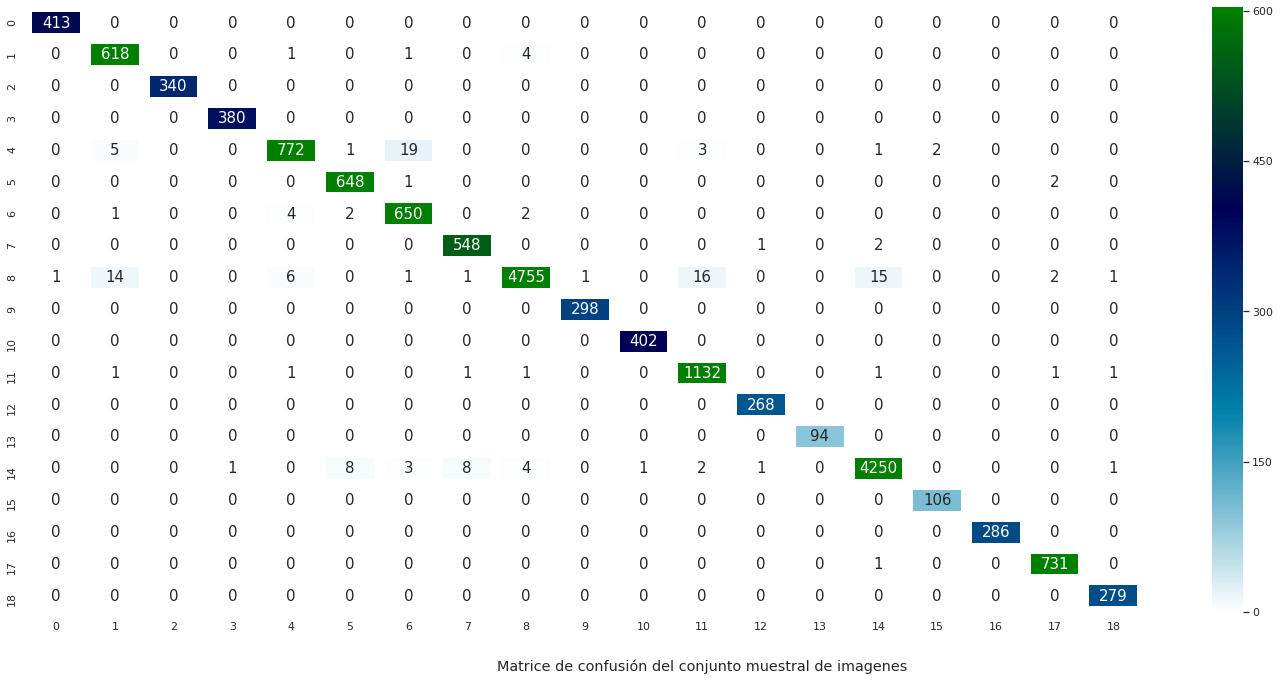

In [113]:
df_cm = pd.DataFrame(cnf_matrix)

fig, (ax1) = plt.subplots(1,1,figsize=(25, 3))
fig.suptitle('Matrice de confusión del conjunto muestral de imagenes')
fig. subplots_adjust(left=None, bottom=1.2, right=None, top=4, wspace=0.19, hspace=None)

g1 = sns.heatmap(df_cm, 
                 annot=True, 
                 fmt="d",
                 cmap = "ocean_r",
                 annot_kws={"size": 15},
                 linewidths=10, 
                 cbar=True, 
                 ax = ax1,
                 robust = True
                )
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=1)

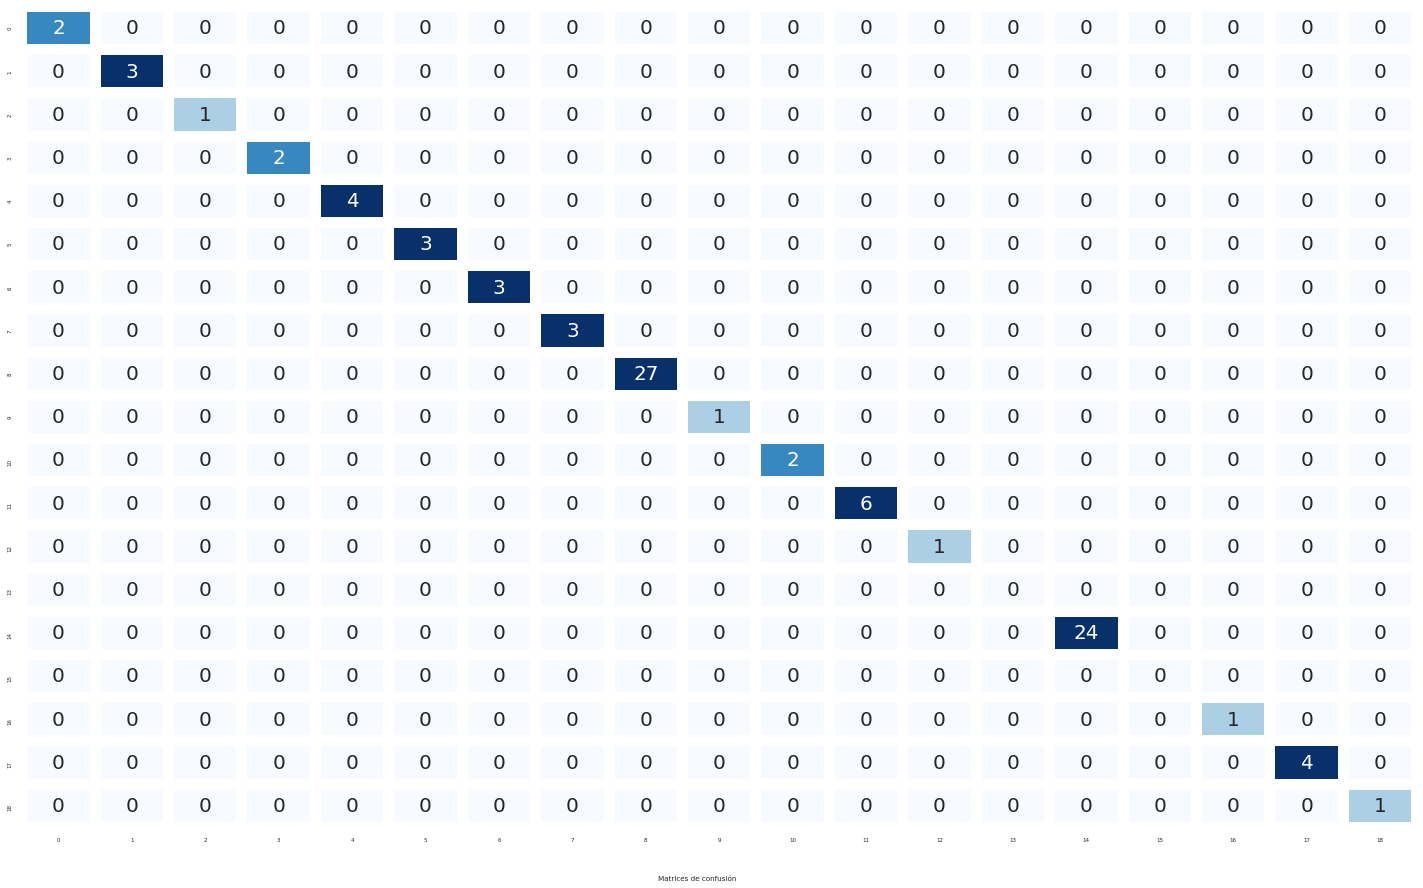

In [99]:
df_cm = pd.DataFrame(cnf_matrix)
df_cmp = (df_cm / df_cm.sum().sum() * 100).astype(int)
fig, (ax1) = plt.subplots(1,1,figsize=(25, 3))
fig.suptitle('Matrices de confusión')
fig.subplots_adjust(left=None, bottom=1.2, right=None, top=5, wspace=0.19, hspace=None)

g1 = sns.heatmap(df_cmp, 
                 annot=True, 
                 fmt="",
                 cmap = "Blues",
                 annot_kws={"size": 20},
                 linewidths=10, 
                 cbar=False, 
                 ax = ax1, 
                 robust=True)
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=0.5)